# Median of Means Stopping Criteria

In [2]:
import qmcpy as qp
import numpy as np
import matplotlib.pyplot as plt


(<Figure size 500x500 with 1 Axes>,
 array([[<AxesSubplot:xlabel='$x_{i1}$', ylabel='$x_{i2}$'>]], dtype=object))

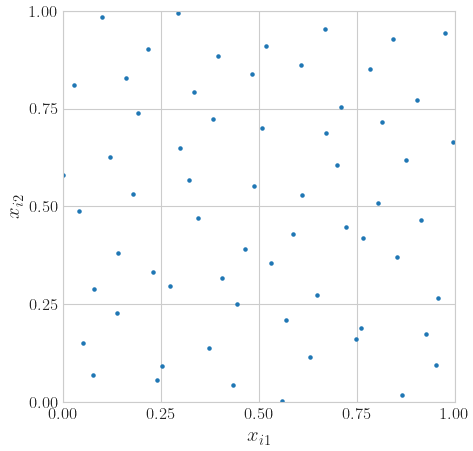

In [11]:
lat = qp.Lattice(dimension=2,generating_vector=28)
dnet = qp.DigitalNetB2(dimension=2,generating_matrices=18)
qp.plot_proj(64,dnet)

In [21]:
import qmcpy as qp

# setting the abs_tol
abs_tol = 1e-3

# Totally Randomized Dnets 
rand_dnet = qp.BoxIntegral(qp.DigitalNetB2(3, 
generating_matrices=25),s = -1)
sol_rand_dnet, data_rand_dnet = qp.CubQMCCLT(
rand_dnet, abs_tol=abs_tol).integrate()
#print(data_rand_dnet)

# Totally Randomized Lattices
rand_lat = qp.BoxIntegral(qp.Lattice(3, 
generating_vector=23),s = -1)
sol_rand_lat, data_rand_lat = qp.CubQMCCLT(
rand_lat, abs_tol=abs_tol).integrate()
print(data_rand_lat)






MeanVarDataRep (AccumulateData Object)
    solution        1.190
    comb_bound_low  1.190
    comb_bound_high 1.191
    comb_flags      1
    n_total         2^(22)
    n               2^(22)
    n_rep           2^(18)
    time_integrate  1.112
CubQMCCLT (StoppingCriterion Object)
    inflate         1.200
    alpha           0.010
    abs_tol         0.001
    rel_tol         0
    n_init          2^(8)
    n_max           2^(30)
    replications    2^(4)
BoxIntegral (Integrand Object)
    s               -1
Uniform (TrueMeasure Object)
    lower_bound     0
    upper_bound     1
Lattice (DiscreteDistribution Object)
    d               3
    dvec            [0 1 2]
    randomize       1
    order           natural
    gen_vec         [      1 2792057 7253609]
    entropy         267799204016689560591720556056015117644
    spawn_key       ()


Integrals to test:
Keister
Functions from L'Ecuyer and Goda    

In [2]:
#keister digital net

d = 2 #deminsion
N_min = 6 #num points min
N_max = 18 #num points max
N_list = 2**np.arange(N_min,N_max) #num points list
r = 11 #number of times ran per trial
num_trials = 25 #number of trials
m_max = 17 #seed

error_median = np.zeros(N_max - N_min) # list of error (per each point set) based on med 
error_mean = np.zeros(N_max - N_min) #list of error (per each point set) based on mean
error_mean_onegen = np.zeros(N_max - N_min) #list of error (per each point set) based on default generator
for i in range(num_trials):
    y_median = [] #integral value med
    y_mean = [] #integral value mean
    y_mean_one_gen = [] #integral value default generator
    list_of_keister_objects_random = [] 
    list_of_keister_objects_default = []
    y_randomized_list = []
    y_default_list = []
    for k in range(r):
        dnet = qp.DigitalNetB2(generating_matrices = m_max,dimension=d)
        keister = qp.Keister(dnet)
        list_of_keister_objects_random.append(keister)
        x = keister.discrete_distrib.gen_samples(N_list.max())
        y = keister.f(x)
        y_randomized_list.append(y)
        keister = qp.Keister(qp.DigitalNetB2(d))
        list_of_keister_objects_default.append(keister)
        x = keister.discrete_distrib.gen_samples(N_list.max())
        y = keister.f(x)    
        y_default_list.append(y) 
    for N in N_list:
        y_median.append(np.median([np.mean(y[:N]) for y in y_randomized_list]))
        y_mean_one_gen.append(np.mean([np.mean(y[:N]) for y in y_default_list]))
        y_mean.append(np.mean([np.mean(y[:N]) for y in y_randomized_list]))
    answer = keister.exact_integ(d)
    error_median += abs(answer-y_median)
    error_mean += abs(answer-y_mean)
    error_mean_onegen += abs(answer-y_mean_one_gen)
    
error_median /= num_trials
error_mean /= num_trials
error_mean_onegen /= num_trials


/Users/zhangbocheng/QMCSoftware/qmcpy/true_measure/gaussian.py:75




































































































































































































































































































































































































































































































































































Error based on mean of means:
[nan nan nan nan nan nan nan nan nan nan nan nan]
Error based on median of means:
[nan nan nan nan nan nan nan nan nan nan nan nan]
Error based on default generator mean of means:
[4.08970921e-02 1.59208252e-02 1.57054786e-02 6.29428271e-03
 3.47694295e-03 1.19275055e-03 7.71158106e-04 3.99407084e-04
 2.35065300e-04 1.21860120e-04 5.37488749e-05 2.87980489e-05]








































































































































































































































































































































































































































































































































































[1.99207204e-03 1.42831048e-03 7.29963066e-04 3.51587077e-04
 1.95929274e-04 1.57382292e-04 6.64381312e-05 3.29535589e-05
 1.31925746e-05 8.99333019e-06 6.71641559e-06 4.65286990e-06]
[1.76984557e-03 6.78175934e-04 3.39891423e-04 1.29397330e-04
 8.46644322e-05 5.39469051e-05 1.70070397e-05 1.28634529e-05
 5.79366683e-06 4.02979742e-06 1.75483917e-06 6.70725912e-07]


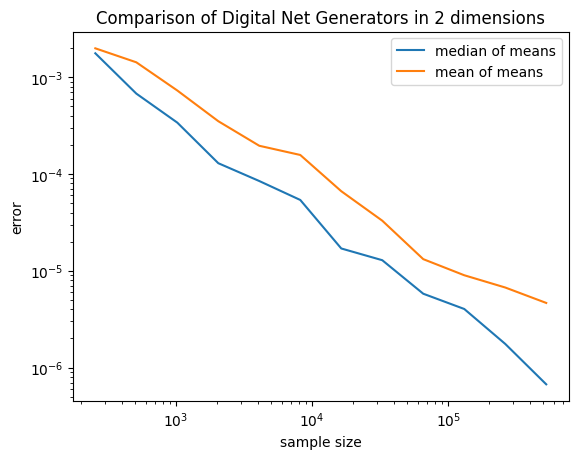

In [76]:

d = 2 #dimension
N_min = 8 
N_max = 20 
N_list = 2**np.arange(N_min,N_max)
r = 11
num_trials = 25
m_max = 32


error_median = np.zeros(N_max - N_min) 
error_mean = np.zeros(N_max - N_min) 
for i in range(num_trials):
    
    y_median = []
    y_mean = []
    y_mean_one_gen = []
    # print(i)
    list_of_keister_objects_random = []
    list_of_keister_objects_default = []
    y_randomized_list = []
    y_default_list = []
    for k in range(r):
        dnet = qp.DigitalNetB2(generating_matrices = m_max,dimension=d)
        keister = qp.Keister(dnet)
        list_of_keister_objects_random.append(keister)
        x = keister.discrete_distrib.gen_samples(N_list.max())
        y = keister.f(x)
        y_randomized_list.append(y)
        keister = qp.Keister(qp.DigitalNetB2(d))
        list_of_keister_objects_default.append(keister)
        x = keister.discrete_distrib.gen_samples(N_list.max())
        y = keister.f(x)    
        y_default_list.append(y) 
            
    for N in N_list:

        y_median.append(np.median([np.mean(y[:N]) for y in y_randomized_list]))
        y_mean.append(np.mean([np.mean(y[:N]) for y in y_randomized_list]))

    answer = keister.exact_integ(d)
    error_median += abs(answer-y_median)
    error_mean += abs(answer-y_mean)

error_median /= num_trials
error_mean /= num_trials

plt.loglog(N_list,error_median,label = "median of means")
plt.loglog(N_list,error_mean,label = "mean of means")
plt.xlabel("sample size")
plt.ylabel("error")
plt.title(f"Comparison of Digital Net Generators in {d} dimensions")
plt.legend()
plt.savefig("./meanvsmedian.png")

print(error_mean)
print(error_median)



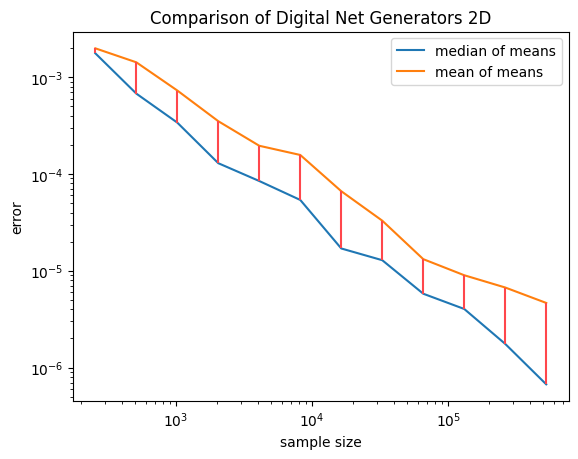

In [77]:
plt.loglog(N_list,error_median,label = "median of means")
plt.loglog(N_list,error_mean,label = "mean of means")

diff = error_median - error_mean
non_zero_diff_idx = np.nonzero(diff)[0]
for idx in non_zero_diff_idx:
    x_val = N_list[idx]
    y_min = min(error_median[idx], error_mean[idx])
    y_max = y_min + abs(diff[idx])
    plt.vlines(x_val, y_min, y_max, color='#ff474c', linestyle='-')


plt.xlabel("sample size")
plt.ylabel("error")
plt.title(f"Comparison of Digital Net Generators {d}D")
plt.legend()
plt.savefig("./meanvsmedian.png")

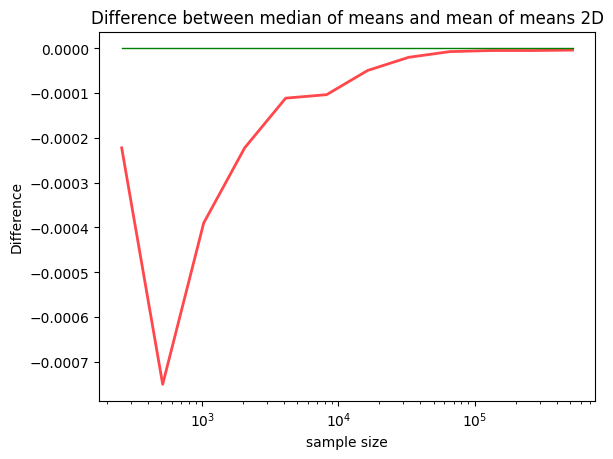

In [78]:
diff = error_median - error_mean
zeros = np.zeros(12)
fig, ax = plt.subplots()

ax.plot(N_list,diff,color='#ff474c',linewidth='2')
ax.plot(N_list,zeros,color='g',linewidth='1')
ax.set_xscale('log')

ax.set_xlabel('sample size')
ax.set_ylabel('Difference')
ax.set_title(f'Difference between median of means and mean of means {d}D')

# Display the plot
plt.show()

[1.75876099e-03 1.05233183e-03 8.22209133e-04 3.11603043e-04
 1.48298035e-04 9.34632541e-05 5.17009263e-05 2.76662152e-05
 1.53996645e-05 6.43306837e-06 2.41075956e-06 1.35488136e-06]
[1.08754612e-03 4.13115472e-04 2.43041554e-04 1.11944435e-04
 5.69932686e-05 2.46970704e-05 1.10191053e-05 6.33541192e-06
 3.92769463e-06 2.13318108e-06 8.87655083e-07 4.41010562e-07]


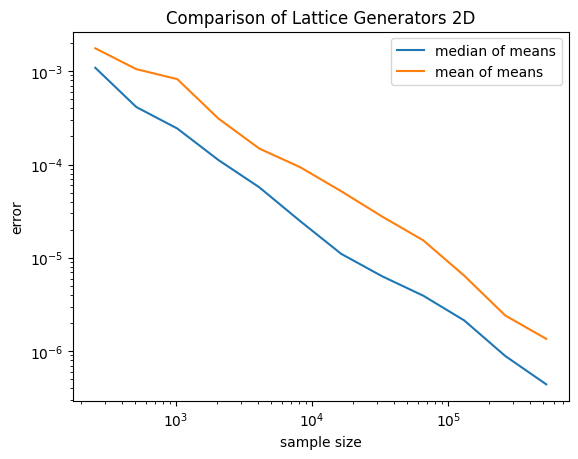

In [72]:
d = 2 #dimension
N_min = 8 #maybe change the parameter?
N_max = 20
N_list = 2**np.arange(N_min,N_max)
r = 11 #the number of random Keister objects to be created
num_trials = 25#the number of trials to be run
m_max = 32 #the maximum number of points in the Keister lattice


error_median = np.zeros(N_max - N_min) 
error_mean = np.zeros(N_max - N_min) 
for i in range(num_trials):
    
    y_median = []
    y_mean = []
    y_mean_one_gen = []
    # print(i)
    list_of_keister_objects_random = []
    list_of_keister_objects_default = []
    y_randomized_list = []
    y_default_list = []
    for k in range(r):
        lattice = qp.Lattice(dimension=d,generating_vector=m_max)
        keister = qp.Keister(lattice)
        list_of_keister_objects_random.append(keister)
        x = keister.discrete_distrib.gen_samples(N_list.max())
        y = keister.f(x)
        y_randomized_list.append(y)
        keister = qp.Keister(qp.Lattice(d))
        list_of_keister_objects_default.append(keister)
        x = keister.discrete_distrib.gen_samples(N_list.max())
        y = keister.f(x)    
        y_default_list.append(y) 
            
    for N in N_list:

        y_median.append(np.median([np.mean(y[:N]) for y in y_randomized_list]))
        y_mean.append(np.mean([np.mean(y[:N]) for y in y_randomized_list]))

    answer = keister.exact_integ(d)
    error_median += abs(answer-y_median)
    error_mean += abs(answer-y_mean)

error_median /= num_trials
error_mean /= num_trials

plt.loglog(N_list,error_median,label = "median of means")
plt.loglog(N_list,error_mean,label = "mean of means")
plt.xlabel("sample size")
plt.ylabel("error")
plt.title(f"Comparison of Lattice Generators {d}D")
plt.legend()
plt.savefig("./meanvsmedian.png")

print(error_mean)
print(error_median)



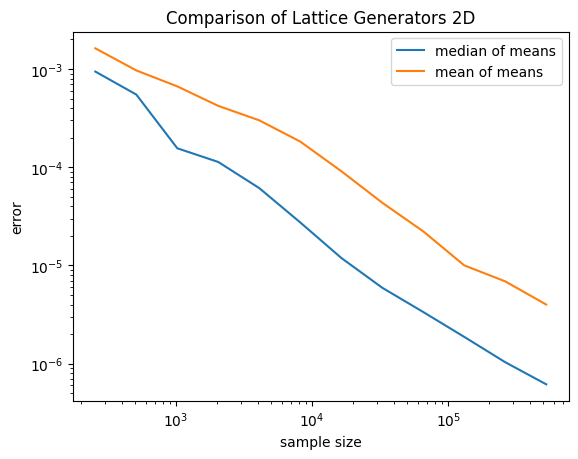

In [56]:
plt.loglog(N_list,error_median,label = "median of means")
plt.loglog(N_list,error_mean,label = "mean of means")
plt.xlabel("sample size")
plt.ylabel("error")
plt.title(f"Comparison of Lattice Generators {d}D")
plt.legend()
plt.savefig("./meanvsmedian.png")

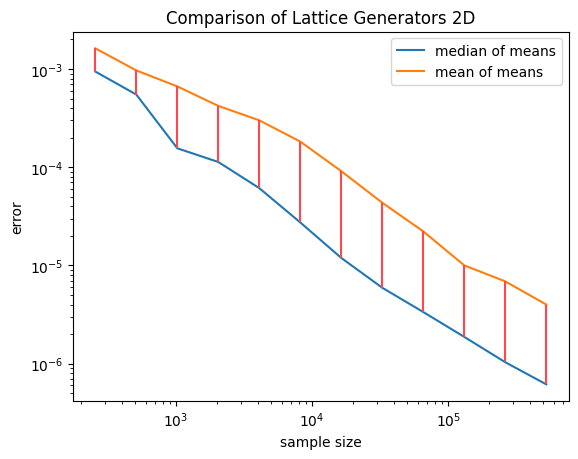

In [57]:
plt.loglog(N_list,error_median,label = "median of means")
plt.loglog(N_list,error_mean,label = "mean of means")

diff = error_median - error_mean
non_zero_diff_idx = np.nonzero(diff)[0]
for idx in non_zero_diff_idx:
    x_val = N_list[idx]
    y_min = min(error_median[idx], error_mean[idx])
    y_max = y_min + abs(diff[idx])
    plt.vlines(x_val, y_min, y_max, color='#ff474c', linestyle='-')


plt.xlabel("sample size")
plt.ylabel("error")
plt.title(f"Comparison of Lattice Generators {d}D")
plt.legend()
plt.savefig("./meanvsmedian.png")

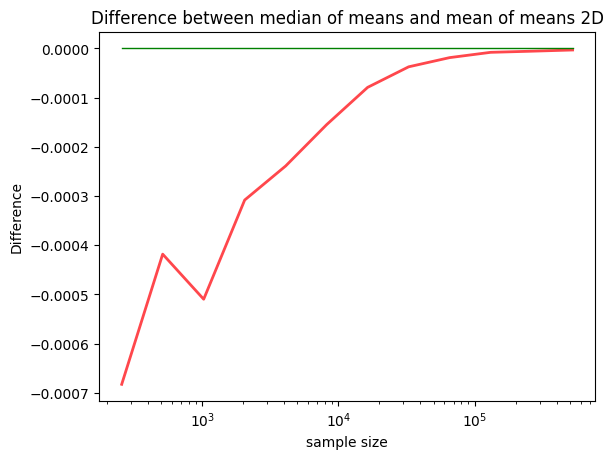

In [58]:
diff = error_median - error_mean
zeros = np.zeros(12)
fig, ax = plt.subplots()

ax.plot(N_list,diff,color='#ff474c',linewidth='2')
ax.plot(N_list,zeros,color='g',linewidth='1')
ax.set_xscale('log')

ax.set_xlabel('sample size')
ax.set_ylabel('Difference')
ax.set_title(f'Difference between median of means and mean of means {d}D')

# Display the plot
plt.show()

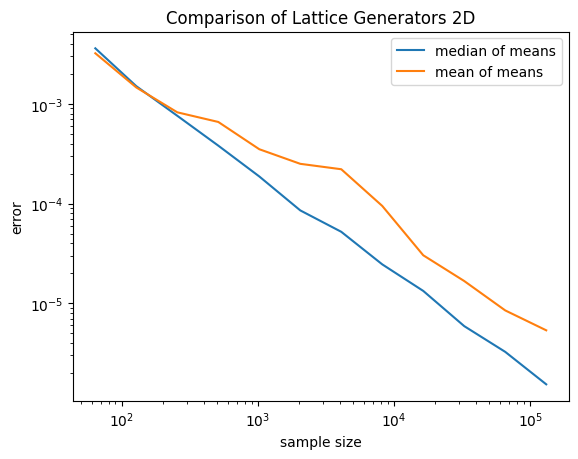

In [4]:
import matplotlib.pyplot as plt
import numpy as np

N_min = 6
N_max = 18
N_list = 2**np.arange(N_min,N_max)

error_median = [3.60889160e-03, 1.50539513e-03, 7.59653502e-04, 3.81236891e-04,1.87161534e-04, 8.54615706e-05, 5.21294379e-05, 2.45711865e-05, 1.33091750e-05, 5.90153082e-06, 3.25775731e-06, 1.53965582e-06]
error_mean = [3.21966034e-03,1.46137954e-03, 8.23127256e-04, 6.58924835e-04,3.51027727e-04, 2.50557767e-04, 2.21102920e-04, 9.47336877e-05, 3.03157079e-05, 1.67232417e-05, 8.48393620e-06, 5.35895624e-06]

plt.loglog(N_list,error_median,label = "median of means")
plt.loglog(N_list,error_mean,label = "mean of means")
plt.xlabel("sample size")
plt.ylabel("error")
plt.title("Comparison of Lattice Generators 2D")
plt.legend()
plt.savefig("./meanvsmedian.png")


In [6]:
#anova
import numpy as np
import pandas as pd
import pingouin as pg

sample_sizes = [2**i for i in range(6, 18)]


error_mean_of_means = [6.85235995e-03, 2.74995566e-03, 1.85257560e-03, 1.11283136e-03,
                       6.61014335e-04, 3.98291875e-04, 2.11435759e-04, 1.03674821e-04,
                       8.24856837e-05, 5.33107712e-05, 4.42634157e-05, 2.49612112e-05]

error_median_of_means = [7.85289152e-03, 3.01169722e-03, 1.80569043e-03, 7.32582365e-04,
                         4.30407837e-04, 2.29028288e-04, 7.33345718e-05, 5.14536897e-05,
                         2.49545773e-05, 1.54029902e-05, 7.96218648e-06, 2.84257983e-06]

data = pd.DataFrame({
    'sample_size': sample_sizes * 2,
    'method': ['mean'] * 12 + ['median'] * 12,
    'error_value': error_mean_of_means + error_median_of_means
})

rm_anova = pg.rm_anova(data=data)
print(rm_anova)

   Source  ddof1  ddof2         F     p-unc       ng2  eps
0  Within      1     23  7.661676  0.010945  0.142777  1.0
